In [1]:
# import libraries 
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
final_complete = gpd.read_file('final_complete.shp')
final_complete[final_complete['Mun_Name'] == 'PARANG']

,Pro_Name,Mun_Name,Number of,Occurence,Household,Access to,Access t_1,Owned Hous,Has Copy B,Married Pr,nearest_he,Overseas W,Distance t,Percentage,Number o_1,Number o_2,School Att,geometry
84,MAGUINDANAO,PARANG,0.1700,1,0.304378,0.566442,0.152549,0.216576,0.770093,0.071779,0.923026,0.077073,0.923026,0.2928,0.08,0.13000,0.595236,"MULTIPOLYGON (((649187.102 812393.477, 649175...."
107,SULU,PARANG,0.0625,1,0.114925,0.073346,0.174390,0.952412,0.881482,0.043112,0.634921,0.060901,0.634921,0.1495,0.01,0.06875,0.613759,"MULTIPOLYGON (((265503.963 665305.251, 265436...."


In [3]:
final_complete = gpd.read_file('final_complete.shp')

province_dict = {'COTABATO (NORTH COTABATO)': ['North Cotabato', [705000, 769000]],
                 'COTABATO CITY (Not a Province)': ['Cotabato City', [630000, 789000]],
                 'BASILAN': ['Basilan', [430000, 695000]],
                 'MAGUINDANAO': ['Maguindanao', [680000, 730000]],
                 'LANAO DEL SUR': ['Lanao del Sur', [680000, 820000]],
                 'TAWI-TAWI': ['Tawi-Tawi', [200000, 765000]],
                 'SULU': ['Sulu', [375000, 605000]]}
feature_dict = {'Occurence': ['Occurence of Armed Conflict in ', 'armed_conflict'],
              'Household': ['Household with Concrete Walls in ', 'concrete_walls'],
              'Access to': ['Access to Electricity in ', 'electricity'],
              'Access t_1': ['Access to Treated Water in ', 'water'],
              'Owned Hous': ['Owned House and Lot in ', 'house_lot'],
              'Has Copy B': ['Birth Registration in ', 'birth_cert'],
              'Married Pr': ['Married Proportion (6-24 yrs. old) in ', 'marriage'],
              'School Att': ['School Attendance (6-24 yrs. old) in ', 'school_attendance'],
              'Overseas W': ['Overseas Worker in Family Proportion in ', 'ofw'], 
              'Distance t': ['Distance to Nearest Health Facility in ', 'nearest_health'], 
              'Percentage': ['Employment Percentage (15-19 yrs. old) in ', 'employment'], 
              'Number o_1': ['Number of High Schools in ', 'high_school'], 
              'Number o_2': ['Number of Elementary Schools and Below in ', 'elem_school']}

In [4]:
def continuous_to_discrete(variable):
    if variable <= 0.33:
        return 1
    elif variable <= 0.66:
        return 2
    else:
        return 3

for i in list(final_complete.columns)[2:]:
    try:
        final_complete[i] = final_complete.apply(lambda x: [continuous_to_discrete(x['School Att']), continuous_to_discrete(x[i])], axis=1)
    except:
        pass
final_complete = final_complete.drop(columns=['School Att'])

In [5]:
# 1, 1 --lavenderblush  # 2, 2 -- powerblue
# 2, 1 --pink           # 3, 3 -- cadetblue
# 3, 1 --hotpink        # 2, 3 -- mediumaquamarine
# 1, 2 --palegreen      # 3, 2 -- plum
# 1, 3 --mediumspringgreen

def discrete_to_color(variables):
    if variables == [1, 1]:
        return 'lavenderblush'
    elif variables == [1, 2]:
        return 'palegreen'
    elif variables == [1, 3]:
        return 'mediumspringgreen'
    elif variables == [2, 1]:
        return 'pink'
    elif variables == [3, 1]:
        return 'hotpink'
    elif variables == [2, 2]:
        return 'powderblue'
    elif variables == [3, 3]:
        return 'cadetblue'
    elif variables == [2, 3]:
        return 'mediumaquamarine'
    elif variables == [3, 2]:
        return 'plum'

for i in list(final_complete.columns)[2:16]:
    try:
        final_complete[i] = final_complete.apply(lambda x: discrete_to_color(x[i]), axis=1)
    except:
        pass
    
final_complete.to_file('final_color.shp', index=False)

In [6]:
final_color = gpd.read_file('final_color.shp')

feature_dict = {'Has Copy B': ['Birth Registration in ', 'birth_cert'],
                'Distance t': ['Distance to Nearest Health Facility in ', 'nearest_health'],
                'Occurence': ['Occurence of Armed Conflict in ', 'armed_conflict'],
              'Household': ['Household with Concrete Walls in ', 'concrete_walls'],
              'Access to': ['Access to Electricity in ', 'electricity'],
              'Access t_1': ['Access to Treated Water in ', 'water'],
              'Owned Hous': ['Owned House and Lot in ', 'house_lot'],
              'Married Pr': ['Married Proportion (6-24 yrs. old) in ', 'marriage'],
              'Overseas W': ['Overseas Worker in Family Proportion in ', 'ofw'], 
              'Percentage': ['Employment Percentage (15-19 yrs. old) in ', 'employment'], 
              'Number o_1': ['Number of High Schools in ', 'high_school'], 
              'Number o_2': ['Number of Elementary Schools and Below in ', 'elem_school']}

In [7]:
province_dict = {'COTABATO (NORTH COTABATO)': ['North Cotabato', [705000, 769000]],
                 'COTABATO CITY (Not a Province)': ['Cotabato City', [630000, 789000]],
                 'BASILAN': ['Basilan', [430000, 695000]],
                 'MAGUINDANAO': ['Maguindanao', [680000, 730000]],
                 'LANAO DEL SUR': ['Lanao del Sur', [680000, 820000]],
                 'TAWI-TAWI': ['Tawi-Tawi', [200000, 765000]],
                 'SULU': ['Sulu', [375000, 605000]]}

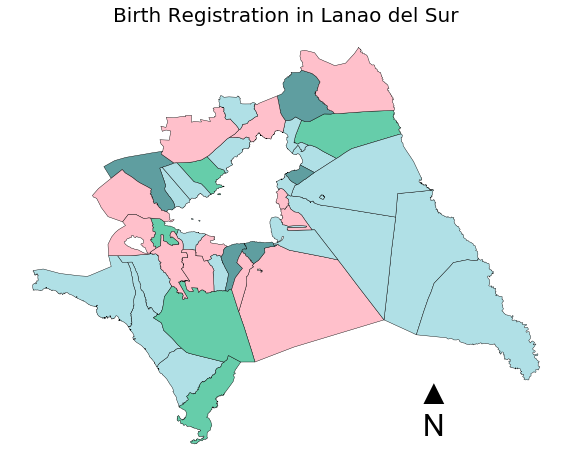

In [15]:
def plot_map(final, province, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final[final['Pro_Name'] == province].plot(color=final[column], ax=ax, edgecolor='black', linewidth=0.4)
    ax.text(province_dict[province][1][0], province_dict[province][1][1], u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    #plt.savefig(file, dpi=500, format='png')

for column, name in feature_dict.items():
    plot_map(final_color, 'LANAO DEL SUR', 
                 name[0] + province_dict['LANAO DEL SUR'][0], 
                 column,
                 name[1] + 'sulu_bivariate.png')
    break


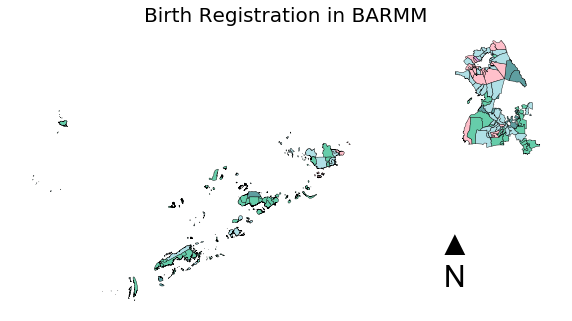

In [10]:
def plot_map(final, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final.plot(color=final[column], ax=ax, edgecolor='black', linewidth=0.4)
    ax.text(600000, 530000,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    plt.savefig(file, dpi=2000, format='png')

    
for column, name in feature_dict.items():
    plot_map(final_color,
              name[0] + 'BARMM',
              column,
              name[1] + '_barmm_bivariate.tiff')
    break

In [ ]:
box11 = np.array([[1,1],[1,2],[2,2],[2,1]])
box12 = box11 + 1

df = gpd.GeoDataFrame(pd.DataFrame([[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1]], 
                  columns=['color','geometry']))
df['color'] = ['lavenderblush', 'powderblue', 'cadetblue', 'palegreen', 'mediumspringgreen','pink', 'hotpink','mediumaquamarine','plum']
df.iloc[0, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]])) 
df.iloc[1, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]]) + 1) 
df.iloc[2, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]]) + 2) 
df.iloc[3, 1] = Polygon(np.array([[2,1],[2,2],[3,2],[3,1]])) 
df.iloc[4, 1] = Polygon(np.array([[3,1],[3,2],[4,2],[4,1]])) 
df.iloc[5, 1] = Polygon(np.array([[1,2],[1,3],[2,3],[2,2]])) 
df.iloc[6, 1] = Polygon(np.array([[1,3],[1,4],[2,4],[2,3]])) 
df.iloc[7, 1] = Polygon(np.array([[4,2],[3,2],[3,3],[4,3]])) 
df.iloc[8, 1] = Polygon(np.array([[2,4],[2,3],[3,3],[3,4]])) 

fig, ax = plt.subplots(figsize=(10,10))
#ax.set_title(title, size=20)
ax.set_axis_off()
df.plot(color=df['color'], ax=ax)
plt.savefig('legend_bivariate.png', dpi=500, format='png')